<div style="
    font-family: 'Georgia', serif;
    color: #2c2c2c;
    text-align: center;
    padding: 10px 0 20px 0;
">

<h2 style="
    font-size: 26px;
    margin-bottom: 5px;
    color: #ad1457;
    font-weight: bold;
    letter-spacing: 0.5px;
    border-bottom: 3px solid #f48fb1;
    padding-bottom: 8px;
    margin-left: auto;
    margin-right: auto;
    width: fit-content;
    min-width: 300px; /* optionnel, largeur min */
">
  Sleep Data Analysis
</h2>

<p style="font-size: 16px; margin: 0;">
  Hajar BADRAOUI 
</p>

<p style="font-size: 14px; color: #555; margin-top: 5px;">
  📧 hajar.badraoui01@gmail.com
</p>

</div>


In [25]:
#2.1
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("white")
from prince import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale
% matplotlib inline

UsageError: Line magic function `%` not found.


### 2.2 Statistiques descriptives et inférentielles

In [27]:
sommeil=pd.read_table("https://sesboue.users.lmno.cnrs.fr/data/data_sommeil.csv", sep=';')
sommeil.head()

,IDEN,AGE,POIDS,TAILLE,ALCOOL,SEXE,INSOMNIE,TABAC,ECRAN
0,ID_001,47,71,158,0,H,NON,OUI,0.50
1,ID_002,56,58,164,7,H,OUI,NON,1.25
2,ID_003,46,116,208,3,H,NON,OUI,1.75
3,ID_004,70,96,186,3,H,NON,OUI,1.00
4,ID_005,51,91,195,2,H,OUI,OUI,1.75


In [28]:
sommeil["IMC"]=sommeil["POIDS"]/(sommeil["TAILLE"]/100)**2
sommeil.head()

,IDEN,AGE,POIDS,TAILLE,ALCOOL,SEXE,INSOMNIE,TABAC,ECRAN,IMC
0,ID_001,47,71,158,0,H,NON,OUI,0.50,28.440955
1,ID_002,56,58,164,7,H,OUI,NON,1.25,21.564545
2,ID_003,46,116,208,3,H,NON,OUI,1.75,26.812130
3,ID_004,70,96,186,3,H,NON,OUI,1.00,27.748873
4,ID_005,51,91,195,2,H,OUI,OUI,1.75,23.931624


In [29]:
sommeil["IMC_INTERPRET"]=np.where(sommeil['IMC']<=25,'Normal','Surpoids')
sommeil.head()

,IDEN,AGE,POIDS,TAILLE,ALCOOL,SEXE,INSOMNIE,TABAC,ECRAN,IMC,IMC_INTERPRET
0,ID_001,47,71,158,0,H,NON,OUI,0.50,28.440955,Surpoids
1,ID_002,56,58,164,7,H,OUI,NON,1.25,21.564545,Normal
2,ID_003,46,116,208,3,H,NON,OUI,1.75,26.812130,Surpoids
3,ID_004,70,96,186,3,H,NON,OUI,1.00,27.748873,Surpoids
4,ID_005,51,91,195,2,H,OUI,OUI,1.75,23.931624,Normal


In [30]:
sommeil.describe()

,AGE,POIDS,TAILLE,ALCOOL,ECRAN,IMC
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,52.270000,90.410000,181.100000,2.950000,2.157500,27.216379
std,11.397195,18.735854,13.366247,3.364626,1.484624,2.802820
min,23.000000,42.000000,158.000000,0.000000,0.000000,16.203079
25%,43.000000,77.000000,166.000000,0.000000,1.000000,27.557928
50%,52.000000,95.000000,186.000000,2.000000,1.750000,28.071981
75%,62.250000,107.000000,194.000000,4.250000,3.062500,28.384802
max,74.000000,120.000000,208.000000,15.000000,6.750000,32.552083


In [45]:
quali=["SEXE", "INSOMNIE", "TABAC", "IMC_INTERPRET"]
for var in quali:
    print(f"Table des effectifs pour {var}")
    print(pd.crosstab(sommeil[var], "freq"))
    print(f"Table des fréquences pour {var}")
    print(pd.crosstab(sommeil[var], "freq", normalize=True))

Table des effectifs pour SEXE
col_0  freq
SEXE       
F        25
H        75
Table des fréquences pour SEXE
col_0  freq
SEXE       
F      0.25
H      0.75
Table des effectifs pour INSOMNIE
col_0     freq
INSOMNIE      
NON         65
OUI         35
Table des fréquences pour INSOMNIE
col_0     freq
INSOMNIE      
NON       0.65
OUI       0.35
Table des effectifs pour TABAC
col_0  freq
TABAC      
NON      36
OUI      64
Table des fréquences pour TABAC
col_0  freq
TABAC      
NON    0.36
OUI    0.64
Table des effectifs pour IMC_INTERPRET
col_0          freq
IMC_INTERPRET      
Normal           17
Surpoids         83
Table des fréquences pour IMC_INTERPRET
col_0          freq
IMC_INTERPRET      
Normal         0.17
Surpoids       0.83


Text(0.5, 1.0, 'Histrogramme des fréquences')

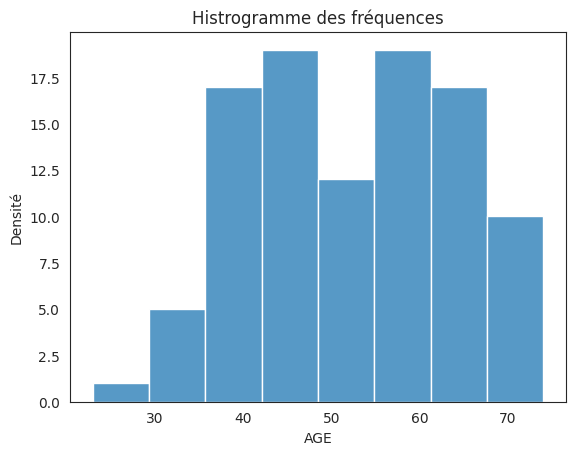

In [48]:
#2.2.6
fig=sb.histplot(sommeil.AGE)
fig.set_ylabel("Densité")
fig.set_title("Histrogramme des fréquences")

In [49]:
sc.stats.shapiro(sommeil.AGE)

ShapiroResult(statistic=0.9701637625694275, pvalue=0.022752514109015465)

p-valeur<0.05 \
AGE ne suit pas une distribution normale

2.2.7.2 \
H0 : AGE suit une loi normale \
contre \
H1 : AGE ne suit pas une loi normale

2.2.7.3 \
L'histogramme n'est pas symétrique. Le résultat du test est en concordance avec l'allure de l'histogramme.

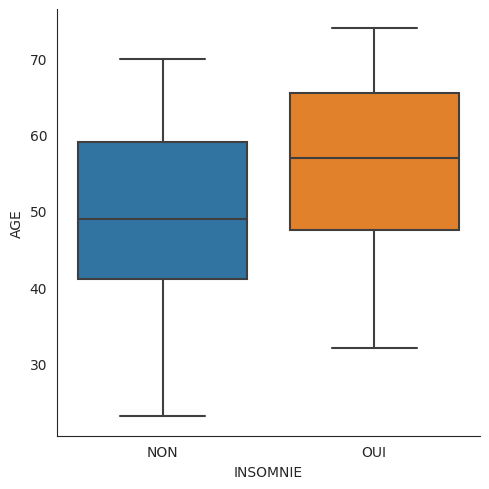

In [52]:
sb.catplot(data=sommeil, x='INSOMNIE', y='AGE', kind='box')

2.2.9 \
Hypothèse : la moyenne de la variable AGE varie selon la variable INSOMNIE

2.2.10 - 2.2.11\
Test d'égalité des variances\
H0 : sigma1 = sigma2\
contre\
H1 : sigma1 != sigma2

In [55]:
age_oui = sommeil[sommeil['INSOMNIE']=='OUI']['AGE']
age_non = sommeil[sommeil['INSOMNIE']=='NON']['AGE']
sc.stats.levene(age_oui, age_non, center='mean')

LeveneResult(statistic=0.004710521749406534, pvalue=0.945421402757875)

p-valeur>0.05. On admet l'égalité des variances

Test d'égalité des moyennes\
H0 : mu1 = mu2\
contre\
H1 : mu1 != mu2

In [56]:
sc.stats.ttest_ind(age_oui, age_non)

Ttest_indResult(statistic=2.462165326297358, pvalue=0.015556175602177775)

p-valeur<0.05. La moyenne d'âge varie significativement selon l'insomnie.

In [57]:
t=pd.crosstab(sommeil.INSOMNIE, sommeil.TABAC)
t

TABAC,NON,OUI
INSOMNIE,,
NON,21,44
OUI,15,20


In [59]:
tf=pd.crosstab(sommeil.INSOMNIE, sommeil.TABAC, normalize='index')
tf

TABAC,NON,OUI
INSOMNIE,,
NON,0.323077,0.676923
OUI,0.428571,0.571429


<Axes: xlabel='INSOMNIE'>

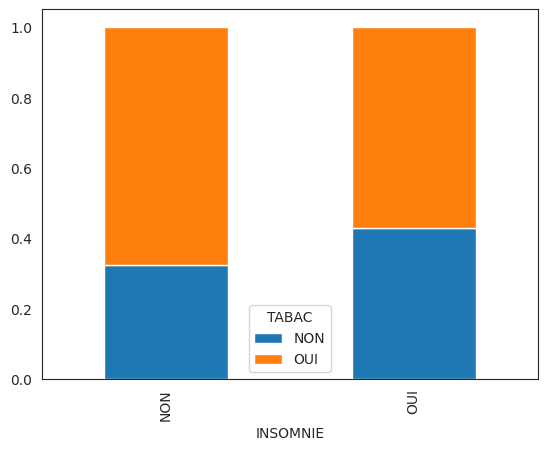

In [62]:
tf.plot(kind='bar', stacked=True)

In [64]:
sc.stats.chi2_contingency(t)

Chi2ContingencyResult(statistic=0.6887210012210008, pvalue=0.4065997565708874, dof=1, expected_freq=array([[23.4, 41.6],
       [12.6, 22.4]]))

2.2.12.5\
H0 : Les variables sont indépendantes \
contre\
H1 : Les variables sont liées\
p-valeur>0.05\
Les données ne nous permettent pas d'affirmer que l'insomnie et la consommation de tabac sont liées

### 2.3 ACP et Classification

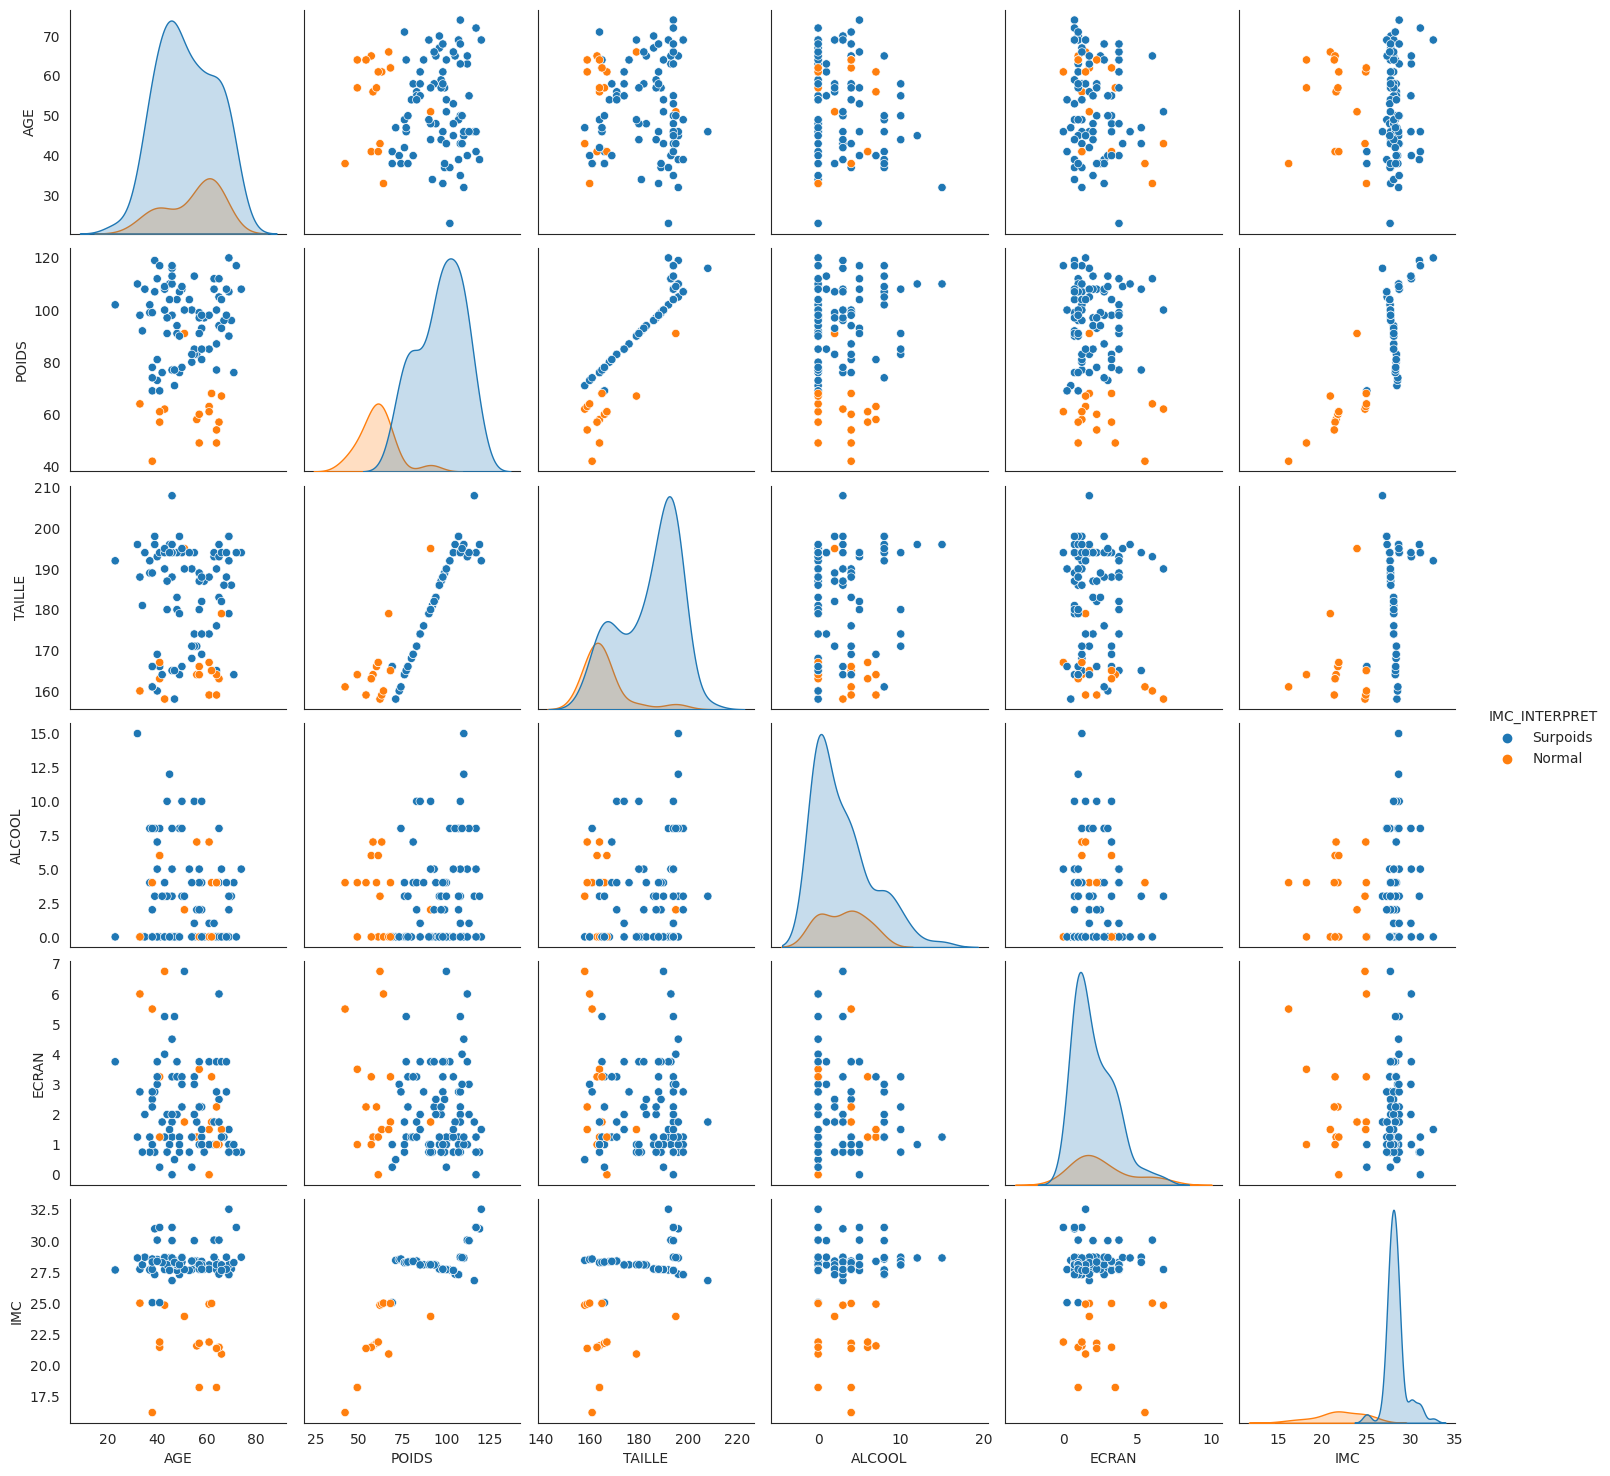

In [67]:
#2.3.1
sb.pairplot(data=sommeil, hue="IMC_INTERPRET")

2.3.2\
Les variables qui séparent le mieux les individus en surpoids ou non sont IMC, POIDS et TAILLE.

In [69]:
sommeil.corr()

/tmp/ipykernel_89212/3633435258.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sommeil.corr()


,AGE,POIDS,TAILLE,ALCOOL,ECRAN,IMC
AGE,1.000000,-0.003977,0.019381,-0.158743,-0.203716,-0.034195
POIDS,-0.003977,1.000000,0.926974,0.091502,-0.101573,0.788115
TAILLE,0.019381,0.926974,1.000000,0.106350,-0.106552,0.506053
ALCOOL,-0.158743,0.091502,0.106350,1.000000,-0.071710,0.019789
ECRAN,-0.203716,-0.101573,-0.106552,-0.071710,1.000000,-0.077413
IMC,-0.034195,0.788115,0.506053,0.019789,-0.077413,1.000000


2.3.4\
Potentiel lien linéaire entre POIDS et TAILLE et entre POIDS et IMC

In [74]:
quanti=["AGE","POIDS","TAILLE","ALCOOL","ECRAN","IMC"]
sommeil_quanti=sommeil[quanti].copy()
sommeil_quanti.head()

,AGE,POIDS,TAILLE,ALCOOL,ECRAN,IMC
0,47,71,158,0,0.50,28.440955
1,56,58,164,7,1.25,21.564545
2,46,116,208,3,1.75,26.812130
3,70,96,186,3,1.00,27.748873
4,51,91,195,2,1.75,23.931624


In [79]:
import prince

pca = prince.PCA(
    n_components=6,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
pca = pca.fit(sommeil_quanti)

In [102]:
#2.3.5.2
eig=pca._eigenvalues_summary
eig["Dimension"] = ["Dim"+str(i+1) for i in range(6)]
eig

,eigenvalue,% of variance,% of variance (cumulative),Dimension
component,,,,
0,2.524087,42.068114,42.068114,Dim1
1,1.225895,20.431584,62.499699,Dim2
2,1.046206,17.436770,79.936469,Dim3
3,0.712602,11.876692,91.813161,Dim4
4,0.488964,8.149408,99.962569,Dim5
5,0.002246,0.037431,100.000000,Dim6


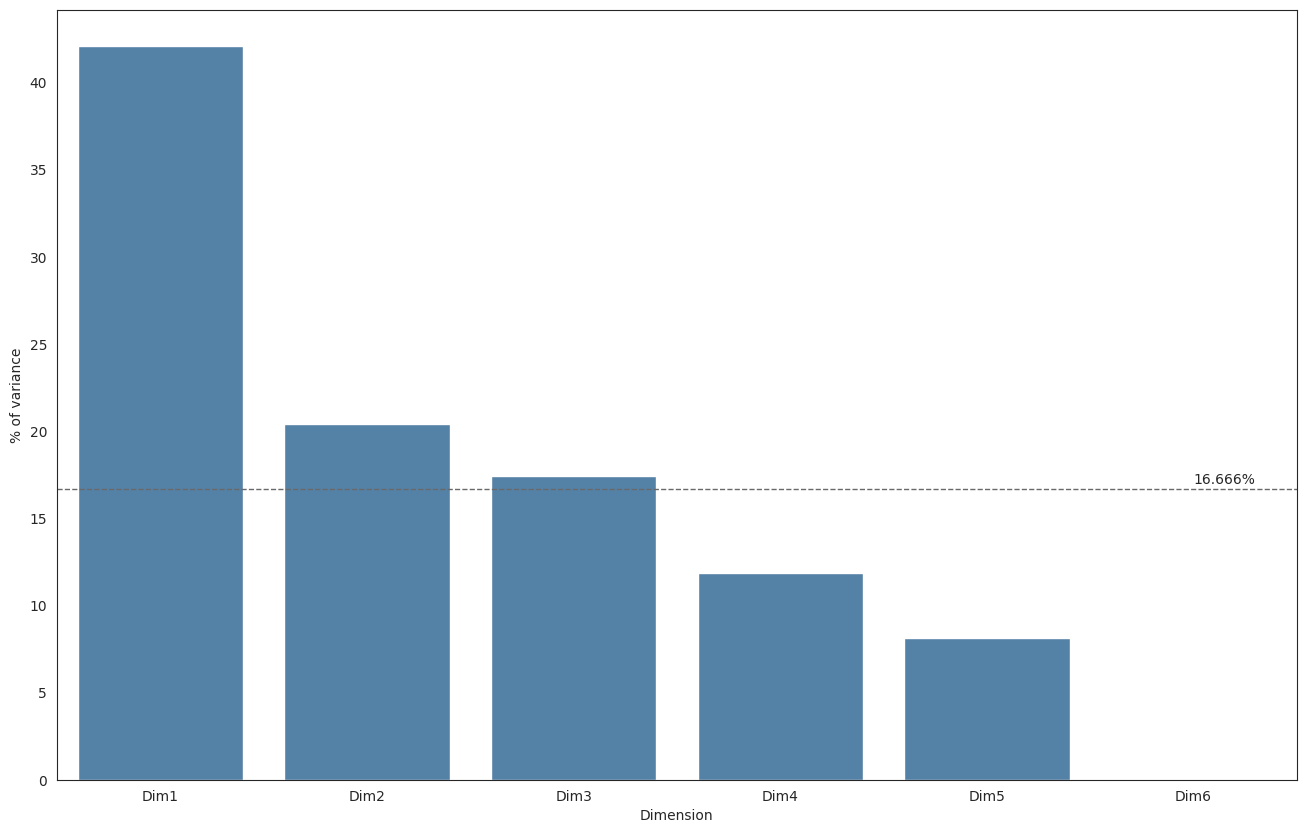

In [108]:
plt.figure(figsize = (16, 10))
sb.barplot(x = "Dimension", y = "% of variance", data = eig, color = "steelblue")
plt.axhline(y=100/6,linewidth = 1, color = "dimgray", linestyle = "--")
plt.text(5, 17, "16.666%")
plt.show()

Le coude est au niveau du 2e axe.\
Trois variables sont au dessus de la moyenne.\
On atteint 80% de l'inertie avec 3 axes et 62% avec 2 axes.\
Nous choisissons donc trois axes.

In [125]:
# Coordonnées
pca.column_coordinates_.iloc[:,:3]

component,0,1,2
variable,,,
AGE,0.000637,-0.834349,-0.043139
POIDS,-0.993015,0.022142,-0.077785
TAILLE,-0.899514,-0.000101,-0.018833
ALCOOL,-0.141487,0.406945,0.811235
ECRAN,0.177442,0.602162,-0.596828
IMC,-0.823030,0.032616,-0.153733


In [126]:
pca.column_contributions_.iloc[:,:3]

component,0,1,2
variable,,,
AGE,1.607966e-07,5.678611e-01,0.001779
POIDS,3.906674e-01,3.999305e-04,0.005783
TAILLE,3.205616e-01,8.393968e-09,0.000339
ALCOOL,7.931014e-03,1.350882e-01,0.629038
ECRAN,1.247414e-02,2.957829e-01,0.340471
IMC,2.683657e-01,8.677762e-04,0.022590


In [127]:
pca.column_cosine_similarities_.iloc[:,:3]

component,0,1,2
variable,,,
AGE,4.058646e-07,6.961381e-01,0.001861
POIDS,9.860783e-01,4.902728e-04,0.006051
TAILLE,8.091254e-01,1.029012e-08,0.000355
ALCOOL,2.001857e-02,1.656040e-01,0.658103
ECRAN,3.148582e-02,3.625988e-01,0.356203
IMC,6.773783e-01,1.063803e-03,0.023634


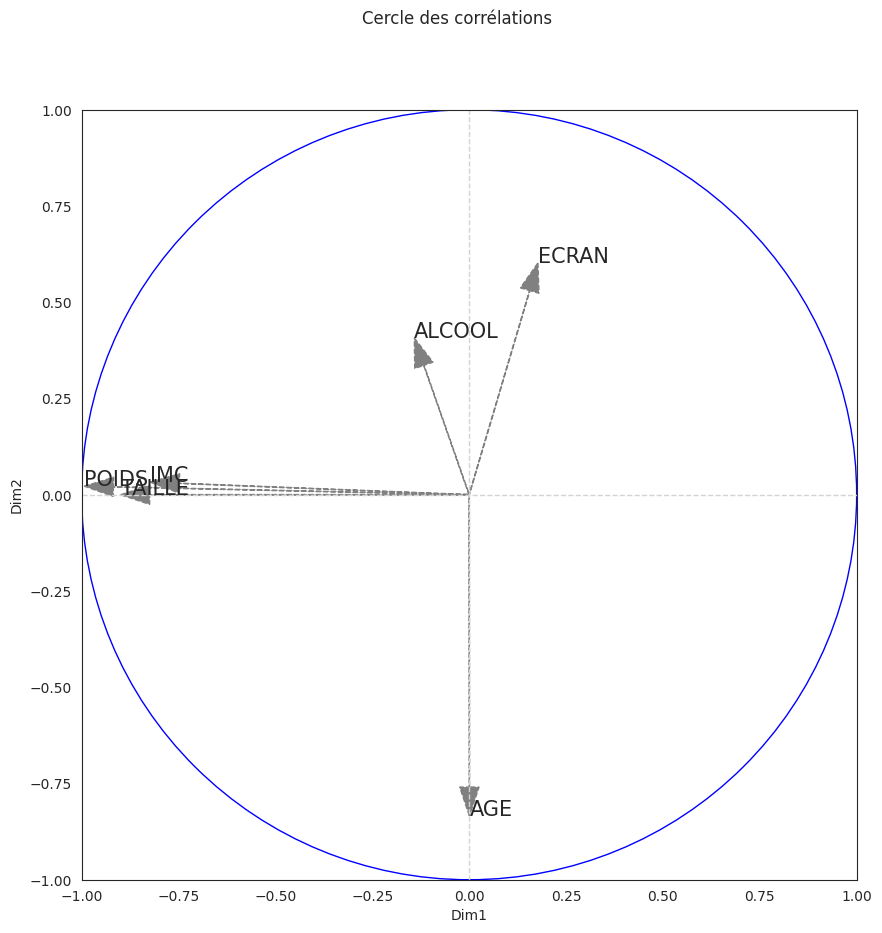

In [129]:
fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.set_xlabel("Dim1")
axes.set_ylabel("Dim2")
for j in range(6):
    axes.text(pca.column_coordinates_[0][j],pca.column_coordinates_[1][j], pca.column_coordinates_.index[j], size = 15)
    axes.arrow(x=0,y=0, dx=pca.column_coordinates_[0][j], dy=pca.column_coordinates_[1][j], 
               color = "gray", linestyle = '--', 
               length_includes_head=True, head_width=0.05)
    
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))


plt.show()

